In [50]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import csv
import Sastrawi
from string import digits

In [51]:
#ambil data dri tgl 2 agustus 2022
data= pd.read_csv('dataulasan.csv',sep=';',encoding='utf-8') #import datanya
df=pd.DataFrame(data[['label','content']]) #mengambil data yang diperlukan saja
df

,label,content
0,Positif,Terimakasih!!!!!!!!!!!!!
1,Positif,Mantap betul lah
2,Positif,goodjob
3,Positif,Sangat mudah diakses
4,Positif,Siip
...,...,...
995,Negatif,"Minta di update tapi ngak bisa, gimana sih"
996,Negatif,Login susah
997,Negatif,Gak bisa daftar
998,Negatif,"aplikasi kont.. bikin emosi,masa tiap login wa..."


# PREPROCESSING

In [52]:
#cleanning :membersihkan data dari simbol,angka,emoji dan 1huruf
def cleanning(content):
    remove_punctuation= "".join([c for c in content if c not in string.punctuation])
    remove_number = ''.join([i for i in remove_punctuation if not i.isdigit()])
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                      "]+", re.UNICODE)
    remove_emoji= re.sub(emoj, '', remove_number)
    remove_single_char=re.sub(r"\b[a-zA-Z]\b", "", remove_emoji)
    return remove_single_char
df['hasil_cleanning']=df['content'].apply(lambda x: cleanning(x))
df

,label,content,hasil_cleanning
0,Positif,Terimakasih!!!!!!!!!!!!!,Terimakasih
1,Positif,Mantap betul lah,Mantap betul lah
2,Positif,goodjob,goodjob
3,Positif,Sangat mudah diakses,Sangat mudah diakses
4,Positif,Siip,Siip
...,...,...,...
995,Negatif,"Minta di update tapi ngak bisa, gimana sih",Minta di update tapi ngak bisa gimana sih
996,Negatif,Login susah,Login susah
997,Negatif,Gak bisa daftar,Gak bisa daftar
998,Negatif,"aplikasi kont.. bikin emosi,masa tiap login wa...",aplikasi kont bikin emosimasa tiap login waktu...


In [53]:
#proses casefolding:mengubah huruf kecil menjadi huruf besar
def casefolding(hasil_cleanning):
    hasil_casefolding=hasil_cleanning.lower()
    return hasil_casefolding
df['hasil_casefolding']=df['hasil_cleanning'].apply(lambda x: casefolding(x))
df[['hasil_cleanning','hasil_casefolding']]

,hasil_cleanning,hasil_casefolding
0,Terimakasih,terimakasih
1,Mantap betul lah,mantap betul lah
2,goodjob,goodjob
3,Sangat mudah diakses,sangat mudah diakses
4,Siip,siip
...,...,...
995,Minta di update tapi ngak bisa gimana sih,minta di update tapi ngak bisa gimana sih
996,Login susah,login susah
997,Gak bisa daftar,gak bisa daftar
998,aplikasi kont bikin emosimasa tiap login waktu...,aplikasi kont bikin emosimasa tiap login waktu...


In [54]:
#proses tokenization:memecah kalimat menjadi kata
from nltk.tokenize import word_tokenize
def tokenization(hasil_casefolding):
    token=word_tokenize(hasil_casefolding)
    return token
df['hasil_token']=df['hasil_casefolding'].apply(lambda x: tokenization(x))
df[['hasil_casefolding','hasil_token']]

,hasil_casefolding,hasil_token
0,terimakasih,[terimakasih]
1,mantap betul lah,"[mantap, betul, lah]"
2,goodjob,[goodjob]
3,sangat mudah diakses,"[sangat, mudah, diakses]"
4,siip,[siip]
...,...,...
995,minta di update tapi ngak bisa gimana sih,"[minta, di, update, tapi, ngak, bisa, gimana, ..."
996,login susah,"[login, susah]"
997,gak bisa daftar,"[gak, bisa, daftar]"
998,aplikasi kont bikin emosimasa tiap login waktu...,"[aplikasi, kont, bikin, emosimasa, tiap, login..."


In [55]:
#stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('indonesian')
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
stop.extend(txt_stopword["stopwords"][0].split(' '))
def stopword (hasil_token):
    return [word for word in hasil_token if word not in stop]
df['hasil_stopword']=df['hasil_token'].apply(lambda x: stopword(x))
df[['hasil_token','hasil_stopword']]

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,hasil_token,hasil_stopword
0,[terimakasih],[terimakasih]
1,"[mantap, betul, lah]",[mantap]
2,[goodjob],[]
3,"[sangat, mudah, diakses]","[mudah, diakses]"
4,[siip],[]
...,...,...
995,"[minta, di, update, tapi, ngak, bisa, gimana, ...",[]
996,"[login, susah]",[susah]
997,"[gak, bisa, daftar]",[daftar]
998,"[aplikasi, kont, bikin, emosimasa, tiap, login...","[aplikasi, sesi, habis, suruh, ulang, keluarny..."


In [56]:
#stemming:menghilangkan imbuhan kata
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
factory=StemmerFactory()
stemmer=factory.create_stemmer()

#stemmed 
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict={}
for document in df['hasil_stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term]=''

for term in term_dict:
    term_dict[term]=stemmed_wrapper(term)
    
#aplikasikan stemming pada dataframe 
def stemming(document):
    return[term_dict[term] for term in document]
df['hasil_stemming']=df['hasil_stopword'].apply(lambda x: stemming(x))
df[['hasil_stopword','hasil_stemming']]

,hasil_stopword,hasil_stemming
0,[terimakasih],[terimakasih]
1,[mantap],[mantap]
2,[],[]
3,"[mudah, diakses]","[mudah, akses]"
4,[],[]
...,...,...
995,[],[]
996,[susah],[susah]
997,[daftar],[daftar]
998,"[aplikasi, sesi, habis, suruh, ulang, keluarny...","[aplikasi, sesi, habis, suruh, ulang, keluar, ..."


In [57]:
#menghapus ulasan yang bernilai kosong
def remove_comments(df):
  #ngecek ulasan yang bernilai zero
  zero_length_comments = df[df["hasil_stemming"].map(len) == 0]
  # mengambil ulasan yang bernilai kosong 
  zero_length_comments_index = [ind for ind in zero_length_comments.index]
  # membuang data yang bernilai kosong 
  df.drop(zero_length_comments_index, inplace = True)
  return df
df = remove_comments(df)
df[['content','hasil_stemming']]

,content,hasil_stemming
0,Terimakasih!!!!!!!!!!!!!,[terimakasih]
1,Mantap betul lah,[mantap]
3,Sangat mudah diakses,"[mudah, akses]"
5,Anda mesti bertanggung jawab atas semua keboco...,"[mesti, tanggung, bocor, data, pribadi, jabat,..."
8,Sangat aman,[aman]
...,...,...
991,"ini kenapa ya,udh di daftar tp gk bisa log in,...","[daftar, muncul, sesi, hapus, unduh]"
992,Mantap,[mantap]
996,Login susah,[susah]
997,Gak bisa daftar,[daftar]


In [58]:
#menentukan tipe data dri setiap kolom
df=df.astype({'hasil_stemming':'string'})
df=df.astype({'label':'category'})


# pembagian dataset

In [59]:
#membagi data menjadi data train dan test
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(df['hasil_stemming'],df['label'] ,test_size=0.2,random_state=42)
print("Data Latih :",len(x_train))
print("Data Uji :",len(x_test))

Data Latih : 591
Data Uji : 148


In [60]:
data_latih=pd.DataFrame(x_train, columns=['hasil_stemming'])
data_latih.insert(1, column='label', value=y_train)
data_latih

,hasil_stemming,label
574,['rumit'],Negatif
633,"['kali', 'masuk', 'mutu']",Negatif
777,"['nama', 'alamat']",Negatif
188,"['aplikasi', 'daftar', 'coba', 'laptop', 'moho...",Negatif
264,['buka'],Negatif
...,...,...
105,"['bagus', 'bantu']",Positif
154,"['mantap', 'bantu']",Positif
350,"['vaksin', 'boster', 'sertifikat', 'vaksin', '...",Negatif
562,['salah'],Negatif


In [61]:
data_uji=pd.DataFrame(x_test, columns=['hasil_stemming'])
data_uji.insert(1, column='label', value=y_test)
data_uji

,hasil_stemming,label
120,"['data', 'bocor']",Negatif
217,"['rusak', 'sebar', 'data', 'pribadi']",Negatif
98,['pergi'],Positif
806,"['cetak', 'kartu', 'vaksin', 'vaksin', 'vaksin...",Negatif
426,"['sinyal', 'internet']",Negatif
...,...,...
287,"['sertifikat', 'vaksinasi']",Negatif
184,"['aplikasi', 'buruk', 'sial']",Negatif
67,"['aplikasi', 'baru']",Negatif
104,"['covid', 'kontrol', 'moga', 'aplikasi', 'mayo...",Positif


# TF

In [62]:
#term frequency(pembobotan kata pada ) data latih
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec_latih=vec.fit_transform(x_train)
word_list=vec.get_feature_names_out();
count_list=vec_latih.toarray().sum(axis=0)
freq=dict(zip(word_list,count_list))
word_list
freq

{'air': 1,
 'akses': 4,
 'aktivitas': 2,
 'akun': 20,
 'akurat': 2,
 'alam': 2,
 'alamat': 1,
 'alami': 2,
 'alih': 3,
 'aman': 5,
 'ambil': 2,
 'ampun': 3,
 'aneh': 5,
 'anggap': 1,
 'antar': 1,
 'antri': 2,
 'aplikasi': 191,
 'arah': 2,
 'at': 1,
 'atur': 2,
 'bagus': 48,
 'bahar': 1,
 'baharu': 24,
 'baik': 38,
 'bansos': 2,
 'bantu': 36,
 'baru': 33,
 'batas': 1,
 'bawa': 1,
 'bayang': 1,
 'bebas': 1,
 'benah': 1,
 'benci': 1,
 'beraktifitas': 1,
 'berangkat': 5,
 'berat': 2,
 'berkah': 1,
 'bidang': 1,
 'bijak': 1,
 'bilang': 3,
 'bingung': 3,
 'bintang': 3,
 'blok': 1,
 'bobol': 1,
 'bocor': 2,
 'bodoh': 2,
 'booster': 8,
 'bosan': 1,
 'boster': 4,
 'bpjs': 1,
 'browser': 1,
 'buka': 60,
 'bukti': 2,
 'bulak': 1,
 'bulan': 1,
 'buruk': 8,
 'butuh': 9,
 'cacat': 1,
 'cair': 2,
 'cari': 5,
 'cepat': 8,
 'cetak': 4,
 'chrome': 3,
 'coba': 24,
 'corona': 1,
 'covid': 5,
 'daftar': 29,
 'dasar': 1,
 'data': 27,
 'dingin': 2,
 'disiplin': 1,
 'dosis': 3,
 'duit': 1,
 'efektif': 1,
 'ef

# PEMODELAN NAIVE BAYES

In [63]:
from sklearn.naive_bayes import MultinomialNB
#pembentukan model Naive Bayes
clf=MultinomialNB()
clf.fit(vec_latih,y_train)

MultinomialNB()

# PREDIKSI DATA UJI

In [64]:
#term frequency(pebobotan kata) data uji
vec_uji=vec.transform(x_test)
vec_uji

<148x408 sparse matrix of type '<class 'numpy.int64'>'
	with 395 stored elements in Compressed Sparse Row format>

In [65]:
#prediksi data uji
predicted=clf.predict(vec_uji)

In [66]:
data_uji.insert(2, column='label_bayes', value=predicted)
data_uji.head(148)

,hasil_stemming,label,label_bayes
120,"['data', 'bocor']",Negatif,Negatif
217,"['rusak', 'sebar', 'data', 'pribadi']",Negatif,Negatif
98,['pergi'],Positif,Positif
806,"['cetak', 'kartu', 'vaksin', 'vaksin', 'vaksin...",Negatif,Negatif
426,"['sinyal', 'internet']",Negatif,Negatif
...,...,...,...
287,"['sertifikat', 'vaksinasi']",Negatif,Negatif
184,"['aplikasi', 'buruk', 'sial']",Negatif,Negatif
67,"['aplikasi', 'baru']",Negatif,Negatif
104,"['covid', 'kontrol', 'moga', 'aplikasi', 'mayo...",Positif,Positif


In [67]:
data_uji = data_uji[['hasil_stemming','label','label_bayes']]

In [68]:
neg_latih=data_latih[(data_latih['label']=='Negatif')]
print('Banyak Data Latih yang Negatif adalah',len(neg_latih))
#menghitung banyak data yang berlabel positif 
pos_latih=data_latih[(data_latih['label']=='Positif')]
print('Banyak Data Latih yang Positif adalah',len(pos_latih))
neg_label=data_uji[(data_uji['label_bayes']=='Negatif')]
print('Banyak Data Uji yang Negatif adalah',len(neg_label))
#menghitung banyak data yang berlabel positif 
pos_label=data_uji[(data_uji['label_bayes']=='Positif')]
print('Banyak Data Uji yang Positif adalah',len(pos_label))

Banyak Data Latih yang Negatif adalah 412
Banyak Data Latih yang Positif adalah 179
Banyak Data Uji yang Negatif adalah 111
Banyak Data Uji yang Positif adalah 37


# MEASURE PERFORMANCE

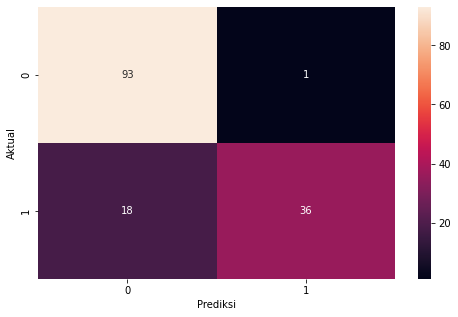

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix (y_test,predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [70]:
#evaluasi data uji
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
print("Nilai Accuracy adalah :" , accuracy_score(predicted,y_test))
print("Nilai Precision adalah :" ,precision_score(predicted,y_test,average='binary',pos_label='Positif'))
print("Nilai Recall adalah :" ,recall_score(predicted,y_test,average='binary',pos_label='Positif'))
print("Nilai  f1_score adalah  :" ,f1_score(predicted,y_test,average='binary',pos_label='Positif'))
print('===============================================================\n')
print(classification_report(predicted,y_test,zero_division=0))

Nilai Accuracy adalah : 0.8716216216216216
Nilai Precision adalah : 0.6666666666666666
Nilai Recall adalah : 0.972972972972973
Nilai  f1_score adalah  : 0.7912087912087912

              precision    recall  f1-score   support

     Negatif       0.99      0.84      0.91       111
     Positif       0.67      0.97      0.79        37

    accuracy                           0.87       148
   macro avg       0.83      0.91      0.85       148
weighted avg       0.91      0.87      0.88       148



# VISUALISASI

Diagram Prediksi Dengan Naive Bayes


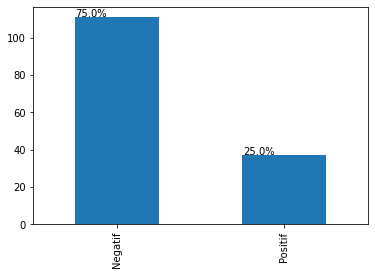

In [71]:
#presentasi label positif dan negatif setelah diuji
sesudah=pd.value_counts(predicted)
ax_sesudah=sesudah.plot.bar()
n=len(predicted)
for p in ax_sesudah.patches:
    ax_sesudah.annotate(str(round(p.get_height()/n*100,2))+'%', (p.get_x() *1.005,p.get_height()*1.005))
print('Diagram Prediksi Dengan Naive Bayes')

In [72]:
from wordcloud import WordCloud,STOPWORDS 
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.axis('off');

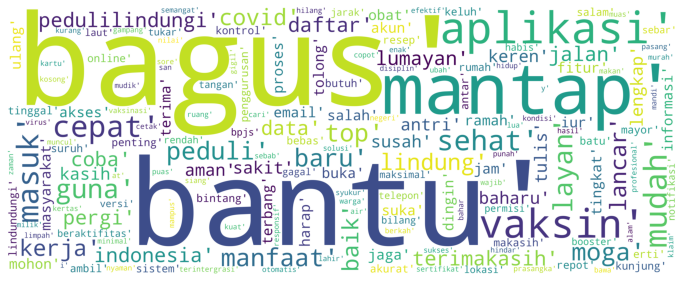

In [73]:
allwords=''.join([text for text in df['hasil_stemming'][df.label=='Positif']])
wordcloud=WordCloud(width=5000, height=2000, random_state=3, background_color='white',collocations=False, stopwords=STOPWORDS).generate(allwords)
plot_cloud(wordcloud)

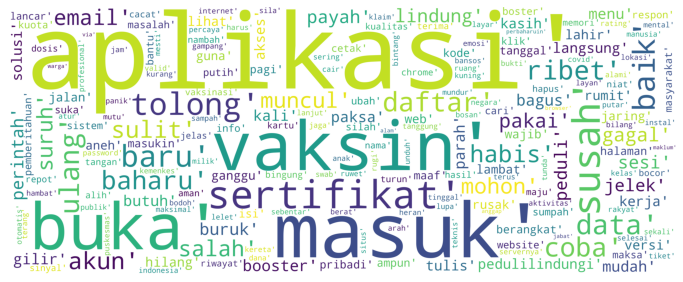

In [74]:
allwords=''.join([text for text in df['hasil_stemming'][df.label=='Negatif']])
wordcloud=WordCloud(width=5000, height=2000, random_state=3, background_color='white',collocations=False, stopwords=STOPWORDS).generate(allwords)
plot_cloud(wordcloud)